 ## Statistics_Anova
 
    최초 작성일 : 2020/03/06
    작성자 : 조예슬 
 
    < 작성 내용 >
    
        - oneway ANOVA
        
        - twoway ANOVA

In [1]:
#근데 집단이 세개 있다면?  t-test 비교를 세번 해야되기 때문에 불편하다. 그래서 ANOVA 방법을 사용한다.



# ANOVA 방식

# 집단이 3개 이상일 때 : One Way ANOVA  (일원 배치 분산 분석)

#        - Independent T-test의 확장 

# 시간의 따른 차이 검정 : Repeated Measured ANOVA (반복 측정 분산 분석)

#         밥먹기 전 후 차이가 있냐 두가지 경우밖에 없으므로 - paired

#         여러개 시간이 있다면 이럴 때 ANOVA를 쓴다. 

# 요인에 따른 차이 검정 : Two Way ANOVA (이원 배치 분산 ??)

#         1000도, 1500도 치킨 맛 차이 이럴 경우 Independent Test를 하면 되는데

#         1000도, 1500도 치킨 맛 차이 , 오븐, 기름에 튀겼을 때 맛차이 일 경우엔 t-test를 두번 하는게 아니고 two-way를 쓴다 

# 시간 + 요인에 따른 차이 : Two Way Repeated Mesured ANOVA (?)

#         집단에서 통증에 대해 실험군, 대조군일땐 t-test 쓰면 되긴 하다.

#         하지만 실험군, 대조군이 늘어나면  One way ANOVA로 갈아타면 되는데

#         만약 시점까지 존재하게 된다면 이걸 써야한다.  실험전, 실험후 + 실험군, 대조군



# 우리가 만약에 베스킨이 있는데 퍼주는 용량을 g이 일정 이상 되어야 하는데  여러번 볼 때 100g이냐 아니냐 조사를 하면 T-Test를 쓰게 된다.

# 그런데 각 매장별로 만족도를 조사해서 차이가 있는지 본다면, 이 경우에는 여러가지 집단이 되기 때문에 ANOVA를 쓴다. 


< 출처 >

https://github.com/slmteruto/academy/blob/master/R_work/StatProject/2_T-test.R

## one way, 집단 3개 이상 일 때


    1) 결과값이 연속변수 ex) age -----------→ 2. kruskal-Wallis H test : kruskal.test() → 사후검정 : posthocTGH()
                ↓                           ↑
                ↓                           ↑
    2) 각각의 결과값이 정규분포 --------------
        : shapiro.test(resid(out))
                ↓
                ↓
    3) 각각의 정규분포가 서로 등분산 --------→ 3.Welch's ANOVA : oneway.test() → 사후검정 : mctp()
        : bartlett.test()
                ↓
                ↓
             1. ANOVA : aov() → 사후검정 : TukeyHSD()


    - 사후검정 : 한 집단과 다른 집단과의 차이 알아보기



### 예시1. LDLC에 따른 진단결과

    종속변수(결과변수) : LDLC(저밀도 콜레스테롤 수치)
    원인변수(독립변수) : Dx(진단 결과) : STEMI, NSTEMI, unstable angina

In [5]:
# acs 데이터 준비

# library(moonBook)
str(acs)
head(acs)

'data.frame':	857 obs. of  17 variables:
 $ age             : int  62 78 76 89 56 73 58 62 59 71 ...
 $ sex             : chr  "Male" "Female" "Female" "Female" ...
 $ cardiogenicShock: chr  "No" "No" "Yes" "No" ...
 $ entry           : chr  "Femoral" "Femoral" "Femoral" "Femoral" ...
 $ Dx              : chr  "STEMI" "STEMI" "STEMI" "STEMI" ...
 $ EF              : num  18 18.4 20 21.8 21.8 22 24.7 26.6 28.5 31.1 ...
 $ height          : num  168 148 NA 165 162 153 167 160 152 168 ...
 $ weight          : num  72 48 NA 50 64 59 78 50 67 60 ...
 $ BMI             : num  25.5 21.9 NA 18.4 24.4 ...
 $ obesity         : chr  "Yes" "No" "No" "No" ...
 $ TC              : num  215 NA NA 121 195 184 161 136 239 169 ...
 $ LDLC            : int  154 NA NA 73 151 112 91 88 161 88 ...
 $ HDLC            : int  35 NA NA 20 36 38 34 33 34 54 ...
 $ TG              : int  155 166 NA 89 63 137 196 30 118 141 ...
 $ DM              : chr  "Yes" "No" "No" "No" ...
 $ HBP             : chr  "No" "Yes"

age,sex,cardiogenicShock,entry,Dx,EF,height,weight,BMI,obesity,TC,LDLC,HDLC,TG,DM,HBP,smoking
62,Male,No,Femoral,STEMI,18.0,168,72,25.51020,Yes,215,154,35,155,Yes,No,Smoker
78,Female,No,Femoral,STEMI,18.4,148,48,21.91381,No,NA,NA,NA,166,No,Yes,Never
76,Female,Yes,Femoral,STEMI,20.0,NA,NA,NA,No,NA,NA,NA,NA,No,Yes,Never
89,Female,No,Femoral,STEMI,21.8,165,50,18.36547,No,121,73,20,89,No,No,Never
56,Male,No,Radial,NSTEMI,21.8,162,64,24.38653,No,195,151,36,63,Yes,Yes,Smoker
73,Female,No,Radial,Unstable Angina,22.0,153,59,25.20398,Yes,184,112,38,137,Yes,Yes,Never


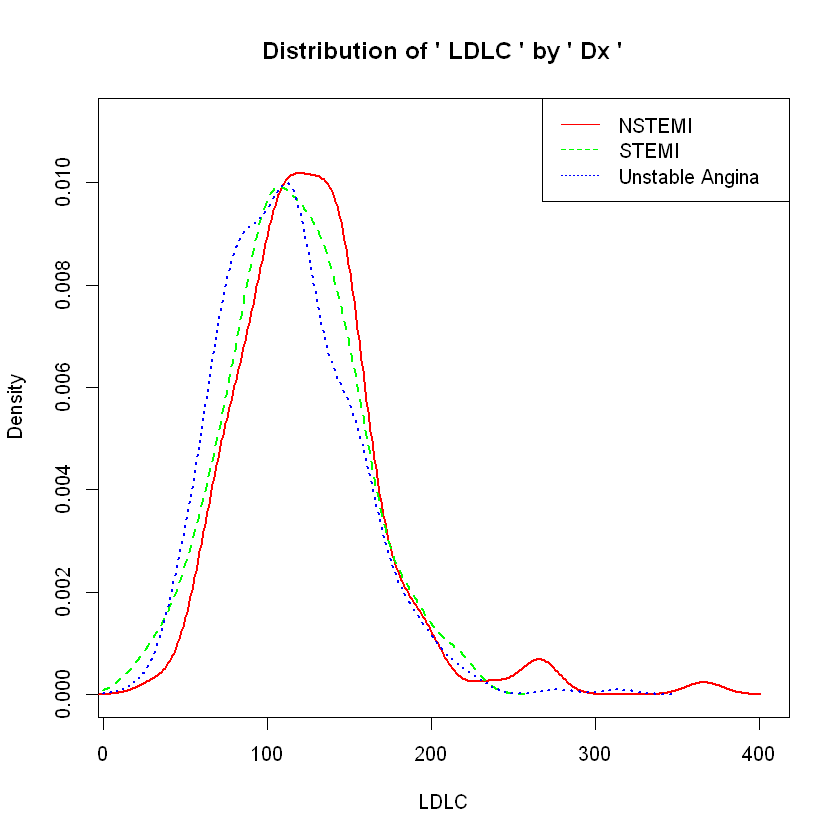

In [6]:
# 정규분포 확인 : 그래프 그려보기

moonBook::densityplot(LDLC ~ Dx, data=acs)
# 그래프로 봤을 떄 초록색 STEMI만 정규분포라고 추측할 수 있다

In [7]:
# 정규분포 확인 : shapiro.test 하나하나 다 계산

shapiro.test(acs$LDLC[acs$Dx=="NSTEMI"])
# p-value 0.05보다 작음 / 정규분포X

shapiro.test(acs$LDLC[acs$Dx=="STEMI"])
# p-value 0.05보다 큼 / 정규분포O

shapiro.test(acs$LDLC[acs$Dx=="Unstable Angina"])
# p-value 0.05보다 작음 / 정규분포X


	Shapiro-Wilk normality test

data:  acs$LDLC[acs$Dx == "NSTEMI"]
W = 0.89996, p-value = 1.56e-08



	Shapiro-Wilk normality test

data:  acs$LDLC[acs$Dx == "STEMI"]
W = 0.99574, p-value = 0.6066



	Shapiro-Wilk normality test

data:  acs$LDLC[acs$Dx == "Unstable Angina"]
W = 0.96889, p-value = 2.136e-07


In [11]:
# 정규분포 확인 : shapiro.test aov를 이용하여 한번에 계산

out = aov(LDLC ~ Dx, data=acs)
out
# Residuals(잔차) : 평균에서 멀어진 값들에 대한 차이, 오차값

# resid(out)
# resid : 잔차 구해주는 함수, 한번에 정규성 확인 가능

shapiro.test(resid(out))
# p-value 0.05보다 작음 / 정규분포X

Call:
   aov(formula = LDLC ~ Dx, data = acs)

Terms:
                     Dx Residuals
Sum of Squares    18765   1386306
Deg. of Freedom       2       830

Residual standard error: 40.86866
Estimated effects may be unbalanced
24 observations deleted due to missingness


	Shapiro-Wilk normality test

data:  resid(out)
W = 0.97137, p-value = 1.024e-11


In [12]:
# 세 그룹의 등분산 확인
# bartlett.test : 세집단 이상일 때 사용하는 등분산

bartlett.test(LDLC ~ Dx, data=acs)
# p-value 0.05보다 큼 / 등분산O
# 데이터의 흩어짐 정도는 비슷했다는 것을 알 수 있음 


	Bartlett test of homogeneity of variances

data:  LDLC by Dx
Bartlett's K-squared = 3.3668, df = 2, p-value = 0.1857


#### 조건에 따른 p-value값 알아보기

             Df  Sum Sq Mean Sq F value  Pr(>F)   
Dx            2   18765    9382   5.617 0.00377 **
Residuals   830 1386305    1670                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
24 observations deleted due to missingness

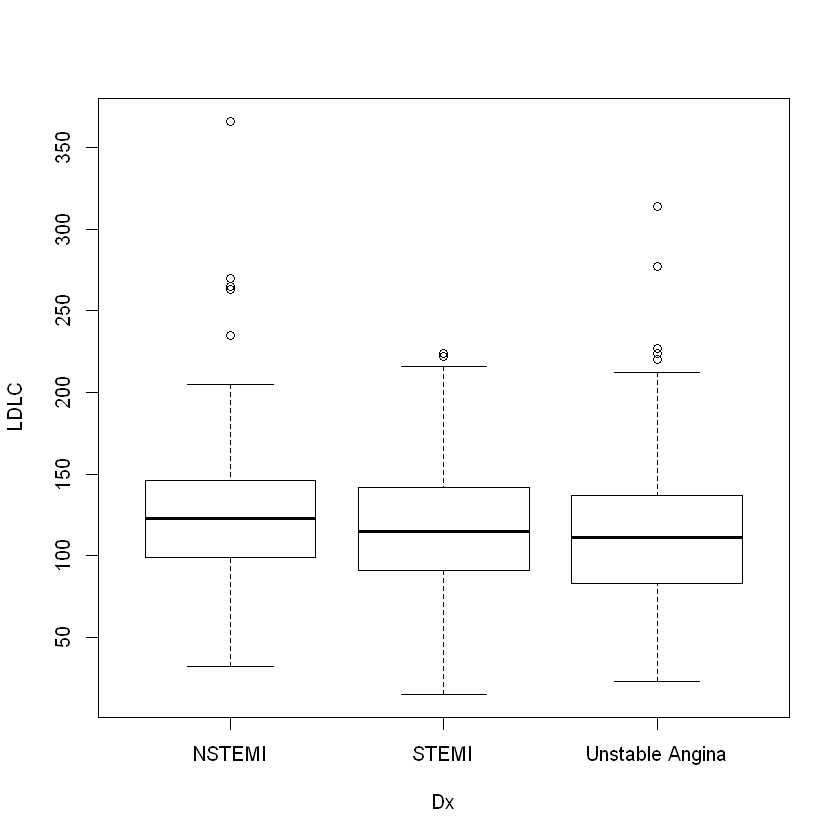

In [26]:
# 정규분포O and 등분산O 일때 세 그룹의 평균 비교 -> aov()  (one way anova 사용)
## 위 데이터, 정규분포는 아니지만....

boxplot(LDLC ~ Dx, data=acs)

out = aov(LDLC ~ Dx, data=acs)
summary(out)
# Pr = 0.00377  0.05보다 작음 
# 대립가설 성립 = 차이가 있음 / 즉, 진단결과에 따른 LDLC의 차이가 있다

In [19]:
# 정규분포O(정규분포 하나) and 등분산X -> oneway.test()   (oneway ANOVA)

oneway.test(LDLC ~ Dx, data=acs, var.equal=F)
# 등분산일때 var.equal=T, 등분산 아닐때 var.equal=F
# p-value = 0.007471  0.05보다 작음
# # 대립가설 성립 = 차이가 있음 / 즉, 진단결과에 따른 LDLC의 차이가 있다


	One-way analysis of means (not assuming equal variances)

data:  LDLC and Dx
F = 4.96, num df = 2.00, denom df = 382.11, p-value = 0.007471


In [28]:
# 연속변수X or 정규분포X -> kruskal.test()
# 세 그룹의 평균을 비교하는 비모수 방법

kruskal.test(LDLC ~ Dx, data=acs)
# p-value = 0.004669  0.05보다 작음 
# 대립가설 성립 = 차이가 있음 / 즉, 진단결과에 따른 LDLC의 차이가 있다


	Kruskal-Wallis rank sum test

data:  LDLC by Dx
Kruskal-Wallis chi-squared = 10.733, df = 2, p-value = 0.004669


#### 사후 검정 : 한 집단과 다른 집단과의 차이 알아보기

In [21]:
# avo() 사용했을 때 사후검정 -> TukeyHSD()
# 정규분포이고 등분산일 때

TukeyHSD(out)
# STEMI-NSTEMI의 p adj = 0.0599378 / 0.05보다 큼 / 집단사이의 차이가 없다
# Unstable Angina-NSTEMI의 p adj = 0.0024227 / 0.05보다 작음 / 집단사이의 차이가 있다
# Unstable Angina-STEMI의 p adj = 0.4419434 / 0.05보다 큼 / 집단사이의 차이가 완벽하게 없다

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = LDLC ~ Dx, data = acs)

$Dx
                             diff       lwr        upr     p adj
STEMI-NSTEMI            -9.370105 -19.04130  0.3010954 0.0599378
Unstable Angina-NSTEMI -13.217357 -22.47817 -3.9565482 0.0024227
Unstable Angina-STEMI   -3.847252 -11.25450  3.5599980 0.4419434


'data.frame':	72 obs. of  2 variables:
 $ count: num  10 7 20 14 14 12 10 23 17 20 ...
 $ spray: Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...


count,spray
10,A
7,A
20,A
14,A
14,A
12,A


Registered S3 methods overwritten by 'ufs':
  method                     from               
  grid.draw.ggProportionPlot userfriendlyscience
  pander.associationMatrix   userfriendlyscience
  pander.dataShape           userfriendlyscience
  pander.descr               userfriendlyscience
  pander.normalityAssessment userfriendlyscience
  print.CramersV             userfriendlyscience
  print.associationMatrix    userfriendlyscience
  print.confIntOmegaSq       userfriendlyscience
  print.confIntV             userfriendlyscience
  print.dataShape            userfriendlyscience
  print.descr                userfriendlyscience
  print.ggProportionPlot     userfriendlyscience
  print.meanConfInt          userfriendlyscience
  print.multiVarFreq         userfriendlyscience
  print.normalityAssessment  userfriendlyscience
  print.scaleDiagnosis       userfriendlyscience
  print.scaleStructure       userfriendlyscience
  print.scatterMatrix        userfriendlyscience


   n means variances
A 12  14.5      22.3
B 12  15.3      18.2
C 12   2.1       3.9
D 12   4.9       6.3
E 12   3.5       3.0
F 12  16.7      38.6

      diff   ci.lo ci.hi    t df    p
B-A   0.83  -4.896   6.6 0.45 22    1
C-A -12.42 -17.226  -7.6 8.41 15 <.01
D-A  -9.58 -14.525  -4.6 6.21 17 <.01
E-A -11.00 -15.764  -6.2 7.58 14 <.01
F-A   2.17  -4.895   9.2 0.96 21  .92
C-B -13.25 -17.645  -8.9 9.75 15 <.01
D-B -10.42 -14.965  -5.9 7.29 18 <.01
E-B -11.83 -16.175  -7.5 8.89 15 <.01
F-B   1.33  -5.526   8.2 0.61 19  .99
D-C   2.83  -0.048   5.7 3.08 21  .06
E-C   1.42  -0.949   3.8 1.87 22  .45
F-C  14.58   8.357  20.8 7.75 13 <.01
E-D  -1.42  -4.185   1.4 1.61 20   .6
F-D  11.75   5.437  18.1 6.08 14 <.01
F-E  13.17   6.969  19.4 7.07 13 <.01

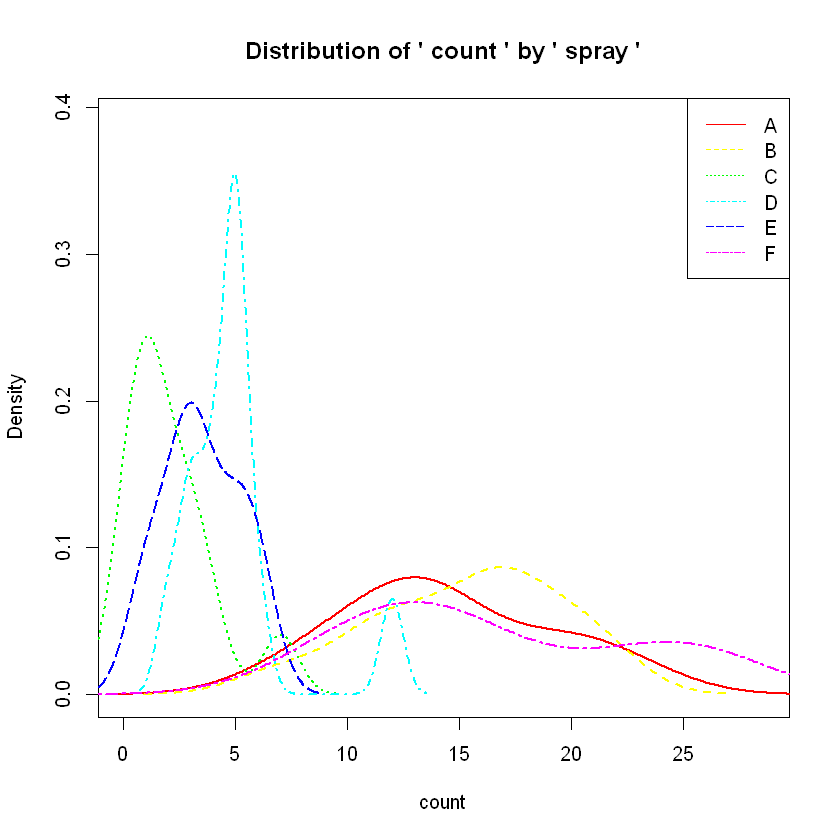

In [31]:
# kruskal.test() 사용했을 때 사후검정 -> posthocTGH
# 정규분포이고 등분산 아닐 때

# install.packages("userfriendlyscience")
# library(userfriendlyscience)

# 다른 예제 사용해보자
str(InsectSprays)
head(InsectSprays)

moonBook::densityplot(count ~ spray, data=InsectSprays)

posthocTGH(x=InsectSprays$spray, y=InsectSprays$count, method="games-howell")
# tukey 방법 쓸때는 method="tukey" 써주고 나머지는 다 games-howell 
# p값 보고 두 집단의 평균을 비교해보자

In [34]:
# oneway.test() 를 사용했을 때 사후 검정 -> mctp()
# Welch's ANOVA의 사후검정방법

# install.packages("nparcomp")
# library(nparcomp)

result <- mctp(LDLC ~ Dx, data=acs)
summary(result)
# analysis 보면 각 값에 따른 p.Value 값 확인 가능


 #----------------Nonparametric Multiple Comparisons for relative effects---------------# 
 
 - Alternative Hypothesis:  True differences of relative effects are not equal to 0 
 - Estimation Method:  Global Pseudo Ranks 
 - Type of Contrast : Tukey 
 - Confidence Level: 95 % 
 - Method = Fisher with 290 DF 
 
 #--------------------------------------------------------------------------------------# 
 

 #----------------Nonparametric Multiple Comparisons for relative effects---------------# 
 
 - Alternative Hypothesis:  True differences of relative effects are not equal to 0 
 - Estimation Method: Global Pseudo ranks 
 - Type of Contrast : Tukey 
 - Confidence Level: 95 % 
 - Method = Fisher with 290 DF 
 
 #--------------------------------------------------------------------------------------# 
 
 #----Data Info-------------------------------------------------------------------------# 
           Sample Size    Effect     Lower     Upper
1          NSTEMI  148 0.5466111 0.5189087 0.

### 예시2. iris
품종별로 Sepal.Width의 평균 차이가 있는가? 차이가 있다면 어느 품종과 차이가 있는가?

In [35]:
# 데이터 준비

str(iris) # 5개 변수에 150개 # species 3개
head(iris)

'data.frame':	150 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 5 5.4 4.6 5 4.4 4.9 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.6 3.9 3.4 3.4 2.9 3.1 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.7 1.4 1.5 1.4 1.5 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [37]:
# 정규분포 확인

out <- aov(Sepal.Width ~ Species, data=iris)
shapiro.test(resid(out))
# p-value = 0.323  0.05보다 크므로 정규분포O


	Shapiro-Wilk normality test

data:  resid(out)
W = 0.98948, p-value = 0.323


In [39]:
# 등분산 확인

bartlett.test(Sepal.Width ~ Species, data=iris)
# p-value = 0.3515  0.05보다 크므로 등분산O


	Bartlett test of homogeneity of variances

data:  Sepal.Width by Species
Bartlett's K-squared = 2.0911, df = 2, p-value = 0.3515


In [41]:
# ANOVA 이용해서 p-value값 알아보기

summary(out)
# Pr 0.05보다 작으므로 대립가설 / 품종별 Sepal.Width 차이가 있다

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  11.35   5.672   49.16 <2e-16 ***
Residuals   147  16.96   0.115                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [42]:
# TukeyHSD 이용해서 사후검정 

TukeyHSD(out)
# p adj 보고 판단 / 모든 품종마다 Sepal.Width 차이가 있네여...

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Sepal.Width ~ Species, data = iris)

$Species
                       diff         lwr        upr     p adj
versicolor-setosa    -0.658 -0.81885528 -0.4971447 0.0000000
virginica-setosa     -0.454 -0.61485528 -0.2931447 0.0000000
virginica-versicolor  0.204  0.04314472  0.3648553 0.0087802


### 예시3. 시, 군, 구 별 출산율 차이
시, 군, 구에 따라서 합계 출산율의 차이가 있는가? 있다면 어느것과 차이가 있는가? 

In [43]:
# 데이터 준비

mydata <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/anova_one_way.csv")
str(mydata) # 4개의 변수 226개
head(mydata)

'data.frame':	226 obs. of  4 variables:
 $ cities    : Factor w/ 226 levels "강원 강릉시",..: 31 30 43 35 29 22 46 28 33 20 ...
 $ birth_rate: num  1.29 1.16 1.1 1.18 1.07 ...
 $ ad_layer  : Factor w/ 3 levels "자치구","자치군",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ ID        : int  1 2 3 4 5 6 7 8 9 10 ...


cities,birth_rate,ad_layer,ID
경기 수원시,1.292,자치시,1
경기 성남시,1.159,자치시,2
경기 의정부시,1.104,자치시,3
경기 안양시,1.177,자치시,4
경기 부천시,1.072,자치시,5
경기 광명시,1.235,자치시,6


In [46]:
# 정규분포 확인

out2 <- aov(birth_rate ~ ad_layer, data=mydata)
shapiro.test(resid(out2))
# p-value 0.05보다 작음 정규분포X


	Shapiro-Wilk normality test

data:  resid(out2)
W = 0.95078, p-value = 5.788e-07


In [47]:
# p-value 값 알기
# 정규분포가 아니므로 kruskal-Wallis H test 사용

kruskal.test(birth_rate ~ ad_layer, data=mydata)
# p-value 0.05 보다 작음 대립가설 성립
# 시, 군, 구에 따라 출산율 차이가 있다(좀 말이 안되는 소리같긴하지만.. 차이가 있다니 뭐..)


	Kruskal-Wallis rank sum test

data:  birth_rate by ad_layer
Kruskal-Wallis chi-squared = 74.612, df = 2, p-value < 2.2e-16


In [49]:
# posthocTGH를 사용하여 사후검정

posthocTGH(x=mydata$ad_layer, y=mydata$birth_rate, method="games-howell")
# p 값을 확인하여 각 집단별 차이를 알아보자 
# p 값이 다 0.05보다 작네 다 차이있데요

        n means variances
자치구 69   1.1     0.041
자치군 82   1.5     0.081
자치시 75   1.4     0.032

                diff ci.lo   ci.hi   t  df    p
자치군-자치구  0.347  0.25  0.4413 8.7 145 <.01
자치시-자치구  0.253  0.18  0.3287 7.9 136 <.01
자치시-자치군 -0.094 -0.18 -0.0052 2.5 138  .04

### 예시4. 다가구 지원조례 채택 여부
Two Way ANOVA 경우 알아보기

In [50]:
# 데이터 준비

mydata <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/anova_two_way.csv")
str(mydata) # 5개의 변수 226개
head(mydata)

'data.frame':	226 obs. of  5 variables:
 $ cities    : Factor w/ 226 levels "강원 강릉시",..: 31 30 43 35 29 22 46 28 33 20 ...
 $ birth_rate: num  1.29 1.16 1.1 1.18 1.07 ...
 $ ad_layer  : Factor w/ 3 levels "자치구","자치군",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ multichild: Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 2 1 ...
 $ ID        : int  1 2 3 4 5 6 7 8 9 10 ...


cities,birth_rate,ad_layer,multichild,ID
경기 수원시,1.292,자치시,NO,1
경기 성남시,1.159,자치시,NO,2
경기 의정부시,1.104,자치시,NO,3
경기 안양시,1.177,자치시,NO,4
경기 부천시,1.072,자치시,NO,5
경기 광명시,1.235,자치시,NO,6


In [51]:
# 정규분포

out <- aov(birth_rate ~ ad_layer + multichild + ad_layer:multichild, data=mydata)
# 이두개를 더해서 각각을 조합할수 있도록 :으로 연결시켜준다 
# 그래야 2개를 조합했을때에 대한 종합적인 분석을 알아낼수있다
# 이거는 birth_rate가 독립변수고
# ad_layer, multichild, ad_layer:multichild 종속변수 3개인거

shapiro.test(resid(out))
# p-value 0.05보다 작아 정규분포X


	Shapiro-Wilk normality test

data:  resid(out)
W = 0.95725, p-value = 2.862e-06


In [53]:
# 정규분포는 아닌데 쌤은 그냥 정규분포O의 절차로 수업을 진행하셨다

# p-value값 알아보기

summary(out)
# 두개를 조합했을 때 summary에서 나타나는 결과값 
# -> ad_layer:multichild  Pr = 0.0263  / 0.05보다 작으므로 대립가설 / 약하지만 차이가 있음을 알수있다 


# 사후검정

TukeyHSD(out)

                     Df Sum Sq Mean Sq F value Pr(>F)    
ad_layer              2  4.722  2.3608  46.312 <2e-16 ***
multichild            1  0.108  0.1082   2.122 0.1466    
ad_layer:multichild   2  0.377  0.1886   3.699 0.0263 *  
Residuals           220 11.215  0.0510                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = birth_rate ~ ad_layer + multichild + ad_layer:multichild, data = mydata)

$ad_layer
                     diff        lwr          upr     p adj
자치군-자치구  0.34704259  0.2600076  0.434077548 0.0000000
자치시-자치구  0.25300406  0.1641325  0.341875611 0.0000000
자치시-자치군 -0.09403854 -0.1791619 -0.008915135 0.0263119

$multichild
            diff         lwr       upr     p adj
YES-NO 0.0877627 -0.03114048 0.2066659 0.1471898

$`ad_layer:multichild`
                             diff         lwr         upr     p adj
자치군:NO-자치구:NO    0.33269631  0.22321791  0.44217472 0.0000000
자치시:NO-자치구:NO    0.25969520  0.14704477  0.37234563 0.0000000
자치구:YES-자치구:NO   0.03739375 -0.26402560  0.33881310 0.9992350
자치군:YES-자치구:NO   0.68234375  0.34779759  1.01688991 0.0000002
자치시:YES-자치구:NO   0.20992708 -0.06721660  0.48707076 0.2524103
자치시:NO-자치군:NO   -0.07300111 -0.18027855  0.03427632 0.3709479
자치구:YES-자치군:NO  -0.29530

### 연속변수나 정규분포가 아닐 경우 
     t-test : MWW, wilcoxen rank sum t-test
     paired t-test : wilcoxen signed rank test
     one way repeated measures anova : friedman test

In [54]:
# 데이터 준비

RoundingTimes <-
  matrix(c(5.40, 5.50, 5.55,
           5.85, 5.70, 5.75,
           5.20, 5.60, 5.50,
           5.55, 5.50, 5.40,
           5.90, 5.85, 5.70,
           5.45, 5.55, 5.60,
           5.40, 5.40, 5.35,
           5.45, 5.50, 5.35,
           5.25, 5.15, 5.00,
           5.85, 5.80, 5.70,
           5.25, 5.20, 5.10,
           5.65, 5.55, 5.45,
           5.60, 5.35, 5.45,
           5.05, 5.00, 4.95,
           5.50, 5.50, 5.40,
           5.45, 5.55, 5.50,
           5.55, 5.55, 5.35,
           5.45, 5.50, 5.55,
           5.50, 5.45, 5.25,
           5.65, 5.60, 5.40,
           5.70, 5.65, 5.55,
           6.30, 6.30, 6.25),
         nrow = 22,
         byrow = TRUE,
         dimnames = list(1 : 22, c("Round Out", "Narrow Angle", "Wide Angle")))

RoundingTimes

Round Out,Narrow Angle,Wide Angle
5.40,5.50,5.55
5.85,5.70,5.75
5.20,5.60,5.50
5.55,5.50,5.40
5.90,5.85,5.70
5.45,5.55,5.60
5.40,5.40,5.35
5.45,5.50,5.35
5.25,5.15,5.00
5.85,5.80,5.70



	Shapiro-Wilk normality test

data:  resid(out)
W = 0.93013, p-value = 0.001112


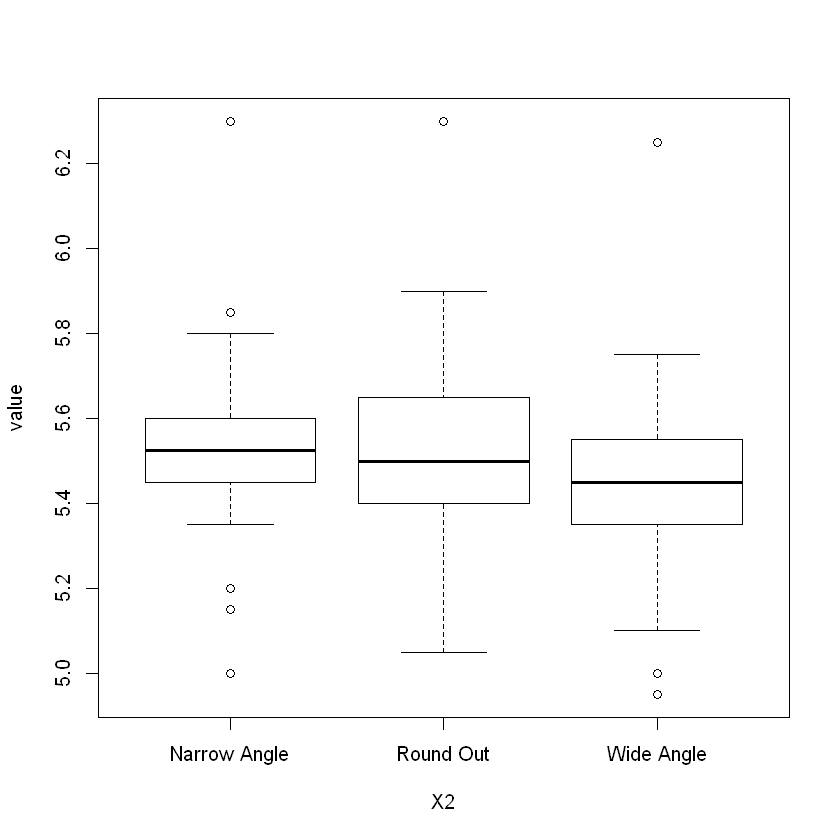

In [58]:
# 정규분포

## long형으로 바꿔주기
# library(reshape)
rt1 <- reshape::melt(RoundingTimes)
# rt1

out <- aov(value ~ X2, data=rt1)
shapiro.test(resid(out))
# p-value 0.001112 0.05보다 낮은 값, 정규분포X

## 정규분포여부 그래프로 확인
boxplot(value ~ X2, data=rt1)
# 정규분포 아님을 볼수있다

#### friedman.test
    
    The Friedman test determines if there are differences among groups for two-way data structured in a specific way, namely in an unreplicated complete block design. 
    
    This test is free from the assumptions of a normal distribution and equal variances(of the residuals)
    
    < 출처 >
    
    https://rcompanion.org/handbook/F_10.html

In [60]:
# p-value 값 확인 -> friedman.test()

friedman.test(RoundingTimes)
# p-value = 0.003805  0.05보다 낮으므로 


	Friedman rank sum test

data:  RoundingTimes
Friedman chi-squared = 11.143, df = 2, p-value = 0.003805


Loading required package: coin
Warning message:
"package 'coin' was built under R version 3.6.3"Loading required package: colorspace


$Friedman.Test

	Asymptotic General Symmetry Test

data:  value by
	 X2 (Narrow Angle, Round Out, Wide Angle) 
	 stratified by X1
maxT = 3.2404, p-value = 0.003427
alternative hypothesis: two.sided


$PostHoc.Test
                                     
Round Out - Narrow Angle  0.623922150
Wide Angle - Narrow Angle 0.053835134
Wide Angle - Round Out    0.003552689



$Friedman.Test

	Asymptotic General Symmetry Test

data:  value by
	 X2 (Narrow Angle, Round Out, Wide Angle) 
	 stratified by X1
maxT = 3.2404, p-value = 0.00339
alternative hypothesis: two.sided


$PostHoc.Test
                                     
Round Out - Narrow Angle  0.623922150
Wide Angle - Narrow Angle 0.053835134
Wide Angle - Round Out    0.003552689


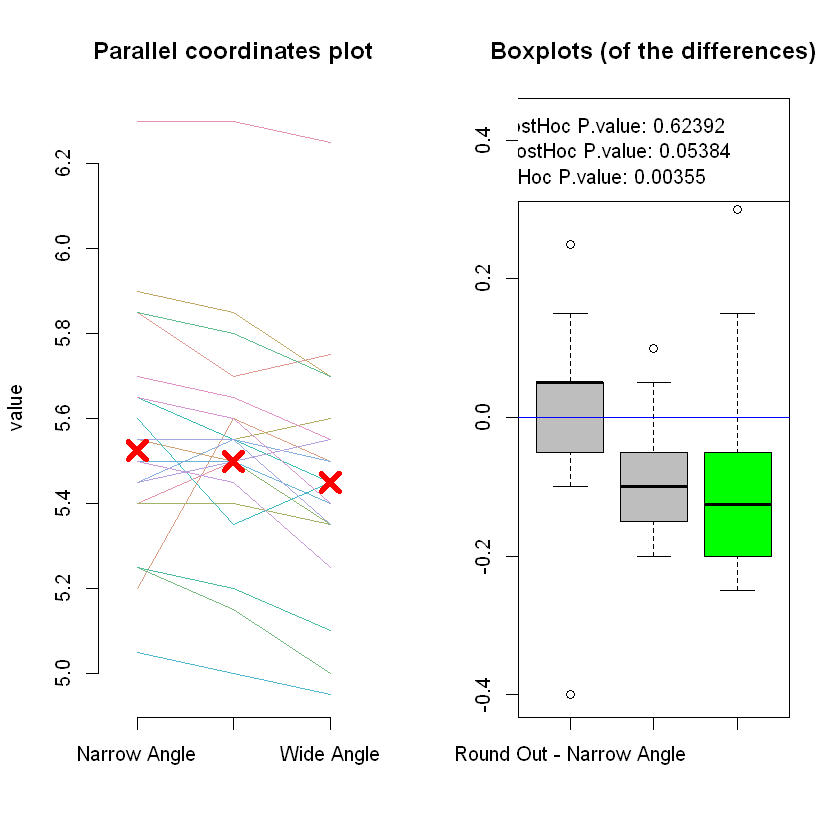

In [62]:
# 사후 검정 -> frideman.test.with.post.hoc
# https://www.r-statistics.com/2010/02/post-hoc-analysis-for-friedmans-test-r-code/
# 좀 많이 복잡...

# install.packages("coin")
friedman.test.with.post.hoc <- function(formu, data, to.print.friedman = T, to.post.hoc.if.signif = T,  
                                        to.plot.parallel = T, to.plot.boxplot = T, signif.P = .05, 
                                        color.blocks.in.cor.plot = T, jitter.Y.in.cor.plot =F)
{
  # formu is a formula of the shape: 	Y ~ X | block
  # data is a long data.frame with three columns:    [[ Y (numeric), X (factor), block (factor) ]]
  
  # Note: This function doesn't handle NA's! In case of NA in Y in one of the blocks, then that entire block should be removed.
  
  
  # Loading needed packages
  if(!require(coin))
  {
    print("You are missing the package 'coin', we will now try to install it...")
    install.packages("coin")
    library(coin)
  }
  
  if(!require(multcomp))
  {
    print("You are missing the package 'multcomp', we will now try to install it...")
    install.packages("multcomp")
    library(multcomp)
  }
  
  if(!require(colorspace))
  {
    print("You are missing the package 'colorspace', we will now try to install it...")
    install.packages("colorspace")
    library(colorspace)
  }
  
  
  # get the names out of the formula
  formu.names <- all.vars(formu)
  Y.name <- formu.names[1]
  X.name <- formu.names[2]
  block.name <- formu.names[3]
  
  if(dim(data)[2] >3) data <- data[,c(Y.name,X.name,block.name)]	# In case we have a "data" data frame with more then the three columns we need. This code will clean it from them...
  
  # Note: the function doesn't handle NA's. In case of NA in one of the block T outcomes, that entire block should be removed.
  
  # stopping in case there is NA in the Y vector
  if(sum(is.na(data[,Y.name])) > 0) stop("Function stopped: This function doesn't handle NA's. In case of NA in Y in one of the blocks, then that entire block should be removed.")
  
  # make sure that the number of factors goes with the actual values present in the data:
  data[,X.name ] <- factor(data[,X.name ])
  data[,block.name ] <- factor(data[,block.name ])
  number.of.X.levels <- length(levels(data[,X.name ]))
  if(number.of.X.levels == 2) { warning(paste("'",X.name,"'", "has only two levels. Consider using paired wilcox.test instead of friedman test"))}
  
  # making the object that will hold the friedman test and the other.
  the.sym.test <- symmetry_test(formu, data = data,	### all pairwise comparisons
                                teststat = "max",
                                xtrafo = function(Y.data) { trafo( Y.data, factor_trafo = function(x) { model.matrix(~ x - 1) %*% t(contrMat(table(x), "Tukey")) } ) },
                                ytrafo = function(Y.data){ trafo(Y.data, numeric_trafo = rank, block = data[,block.name] ) }
  )
  # if(to.print.friedman) { print(the.sym.test) }
  
  
  if(to.post.hoc.if.signif)
  {
    if(pvalue(the.sym.test) < signif.P)
    {
      # the post hoc test
      The.post.hoc.P.values <- pvalue(the.sym.test, method = "single-step")	# this is the post hoc of the friedman test
      
      
      # plotting
      if(to.plot.parallel & to.plot.boxplot)	par(mfrow = c(1,2)) # if we are plotting two plots, let's make sure we'll be able to see both
      
      if(to.plot.parallel)
      {
        X.names <- levels(data[, X.name])
        X.for.plot <- seq_along(X.names)
        plot.xlim <- c(.7 , length(X.for.plot)+.3)	# adding some spacing from both sides of the plot
        
        if(color.blocks.in.cor.plot)
        {
          blocks.col <- rainbow_hcl(length(levels(data[,block.name])))
        } else {
          blocks.col <- 1 # black
        }
        
        data2 <- data
        if(jitter.Y.in.cor.plot) {
          data2[,Y.name] <- jitter(data2[,Y.name])
          par.cor.plot.text <- "Parallel coordinates plot (with Jitter)"
        } else {
          par.cor.plot.text <- "Parallel coordinates plot"
        }
        
        # adding a Parallel coordinates plot
        matplot(as.matrix(reshape(data2,  idvar=X.name, timevar=block.name,
                                  direction="wide")[,-1])  ,
                type = "l",  lty = 1, axes = FALSE, ylab = Y.name,
                xlim = plot.xlim,
                col = blocks.col,
                main = par.cor.plot.text)
        axis(1, at = X.for.plot , labels = X.names) # plot X axis
        axis(2) # plot Y axis
        points(tapply(data[,Y.name], data[,X.name], median) ~ X.for.plot, col = "red",pch = 4, cex = 2, lwd = 5)
      }
      
      if(to.plot.boxplot)
      {
        # first we create a function to create a new Y, by substracting different combinations of X levels from each other.
        subtract.a.from.b <- function(a.b , the.data)
        {
          the.data[,a.b[2]] - the.data[,a.b[1]]
        }
        
        temp.wide <- reshape(data,  idvar=X.name, timevar=block.name,
                             direction="wide") 	#[,-1]
        wide.data <- as.matrix(t(temp.wide[,-1]))
        colnames(wide.data) <- temp.wide[,1]
        
        Y.b.minus.a.combos <- apply(with(data,combn(levels(data[,X.name]), 2)), 2, subtract.a.from.b, the.data =wide.data)
        names.b.minus.a.combos <- apply(with(data,combn(levels(data[,X.name]), 2)), 2, function(a.b) {paste(a.b[2],a.b[1],sep=" - ")})
        
        the.ylim <- range(Y.b.minus.a.combos)
        the.ylim[2] <- the.ylim[2] + max(sd(Y.b.minus.a.combos))	# adding some space for the labels
        is.signif.color <- ifelse(The.post.hoc.P.values < .05 , "green", "grey")
        
        boxplot(Y.b.minus.a.combos,
                names = names.b.minus.a.combos ,
                col = is.signif.color,
                main = "Boxplots (of the differences)",
                ylim = the.ylim
        )
        legend("topright", legend = paste(names.b.minus.a.combos, rep(" ; PostHoc P.value:", number.of.X.levels),round(The.post.hoc.P.values,5)) , fill =  is.signif.color )
        abline(h = 0, col = "blue")
        
      }
      
      list.to.return <- list(Friedman.Test = the.sym.test, PostHoc.Test = The.post.hoc.P.values)
      if(to.print.friedman) {print(list.to.return)}
      return(list.to.return)
      
    }	else {
      print("The results where not significant, There is no need for a post hoc test")
      return(the.sym.test)
    }
  }
  
  # Original credit (for linking online, to the package that performs the post hoc test) goes to "David Winsemius", see:
  # http://tolstoy.newcastle.edu.au/R/e8/help/09/10/1416.html
}

friedman.test.with.post.hoc(value ~ X2 | X1, rt1)


# 본페로니 검정 
# 0.05 / 3 
## 여러개가 나오면 0.05로만 볼 수 없으니, 각각으로 나눠야 정확하게 나옴
## 즉, 0.016보다 작아야 차이가 있는것 ........

## Two Way Repeated Mesures ANOVA

### 예시1. 여드름 치료제에 대한 임상테스트 결과

In [86]:
# 데이터 준비

mydata <- read.csv("C:/Users/cho ye seul/Documents/예슬/Acorn/rwork/StatProject/data/10_rmanova.csv")
str(mydata) # 4개의 변수 226개
mydata

'data.frame':	14 obs. of  6 variables:
 $ group : int  1 1 1 1 1 1 1 2 2 2 ...
 $ id    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ month0: int  60 52 62 58 65 58 53 55 55 60 ...
 $ month1: int  41 38 36 34 34 42 38 42 54 55 ...
 $ month3: int  25 23 22 21 28 26 25 33 46 46 ...
 $ month6: int  16 12 14 13 18 16 21 22 26 23 ...


group,id,month0,month1,month3,month6
1,1,60,41,25,16
1,2,52,38,23,12
1,3,62,36,22,14
1,4,58,34,21,13
1,5,65,34,28,18
1,6,58,42,26,16
1,7,53,38,25,21
2,8,55,42,33,22
2,9,55,54,46,26
2,10,60,55,46,23


In [91]:
# long형으로 구조 변경
library(reshape2)

## 변경 방법1
ac1 <- reshape(mydata, direction = "long", varying = 3:6, sep="")
str(ac1) # 4개변수 56개 데이터
head(ac1)
# direction : "wide" or "long"으로 형태지정
# varying : mydata의 3번째 column 부터 6번째 column까지  하나의 column으로 하겠다는 의미


## 변경 방법2
ac2 <- reshape2::melt(mydata, id=c("group", "id"), variable.name = "time",
                     value.name="month", measure.vars = c("month0", "month1", "month3", "month6"))
                    # id값, 변수값, 값이름
str(ac2) # 4개 변수 56개 데이터
head(ac2)

'data.frame':	56 obs. of  4 variables:
 $ group: int  1 1 1 1 1 1 1 2 2 2 ...
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ time : num  0 0 0 0 0 0 0 0 0 0 ...
 $ month: int  60 52 62 58 65 58 53 55 55 60 ...
 - attr(*, "reshapeLong")=List of 4
  ..$ varying:List of 1
  .. ..$ month: chr  "month0" "month1" "month3" "month6"
  .. ..- attr(*, "v.names")= chr "month"
  .. ..- attr(*, "times")= num  0 1 3 6
  ..$ v.names: chr "month"
  ..$ idvar  : chr "id"
  ..$ timevar: chr "time"


,group,id,time,month
1.0,1,1,0,60
2.0,1,2,0,52
3.0,1,3,0,62
4.0,1,4,0,58
5.0,1,5,0,65
6.0,1,6,0,58


'data.frame':	56 obs. of  4 variables:
 $ group: int  1 1 1 1 1 1 1 2 2 2 ...
 $ id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ time : Factor w/ 4 levels "month0","month1",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month: int  60 52 62 58 65 58 53 55 55 60 ...


group,id,time,month
1,1,month0,60
1,2,month0,52
1,3,month0,62
1,4,month0,58
1,5,month0,65
1,6,month0,58


[1] "factor"

'data.frame':	56 obs. of  4 variables:
 $ group: Factor w/ 2 levels "1","2": 1 1 1 1 1 1 1 2 2 2 ...
 $ id   : Factor w/ 14 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ time : Factor w/ 4 levels "0","1","3","6": 1 1 1 1 1 1 1 1 1 1 ...
 $ month: int  60 52 62 58 65 58 53 55 55 60 ...
 - attr(*, "reshapeLong")=List of 4
  ..$ varying:List of 1
  .. ..$ month: chr  "month0" "month1" "month3" "month6"
  .. ..- attr(*, "v.names")= chr "month"
  .. ..- attr(*, "times")= num  0 1 3 6
  ..$ v.names: chr "month"
  ..$ idvar  : chr "id"
  ..$ timevar: chr "time"


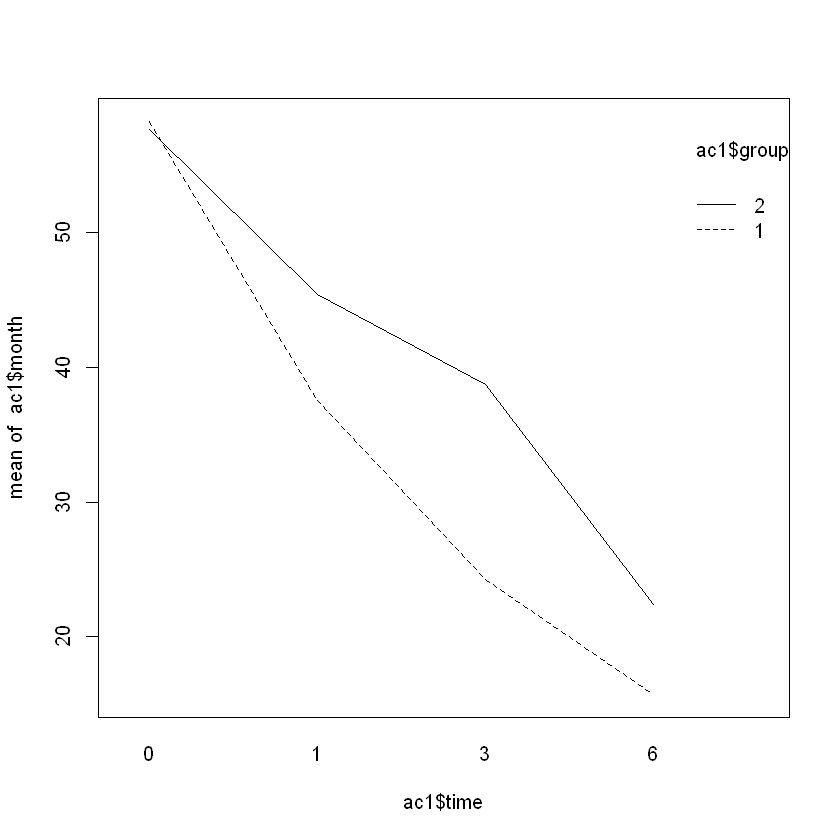

In [81]:
# 시각화

## ?interaction.plot # factor를 사용함

## 현재 상태는 int 형태
class(ac1$group)

## 시각화 시키기 위해선 factor 형태로 바꿔주기
ac1$group <- factor(ac1$group)
ac1$id <- factor(ac1$id) 
ac1$time <- factor(ac1$time)

## factor로 바뀜을 볼수있음
str(ac1)

## 시각화 시키기
interaction.plot(ac1$time, ac1$group, ac1$month)
## 그래프를 통해서도 각 그룹의 차이가 얼마나 나는지 확인이 가능하다
## 밑의 과정들을 통해 수치적으로 정확하게 알아보자

In [90]:
# p-value 값 확인

# 정규분포라는 가정하에 진행

out <- aov(month ~ group*time + Error(id), data=ac1) 
# 앞에서는 요인을 하나 더 추가해서 보는거였다면, 
# 위에꺼는 다른 요인을 조합해서 서로 다른 관점에서 보려고 하는거기 때문에 'group*time' 곱하기로 작성 
# 다른관점에서 조합이 되는 것이라서 + 가아닌 *로 한다 
# Error옵션을 해주면 자세한 출력결과를 보여준다

summary(out) #Error부분이 상세정보


Error: id
      Df Sum Sq Mean Sq
group  1  472.2   472.2

Error: Within
           Df Sum Sq Mean Sq F value Pr(>F)    
group       1    242     242   5.665 0.0211 *  
time        1  10375   10375 242.362 <2e-16 ***
group:time  1     69      69   1.613 0.2098    
Residuals  51   2183      43                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [83]:
# 사후 검정

# 정규분포라는 가정하에 진행

ac_0 <- ac1[ac1$time == "0", ] # 시점별로 쪼개주기 
ac_1 <- ac1[ac1$time == "1", ] 
ac_3 <- ac1[ac1$time == "3", ] 
ac_6 <- ac1[ac1$time == "6", ] 

0.05 / 6 
# 앞에 있는 두 그룹과 조합이 된거 4C2 = 4*3/2 = 6 
# 4개중에 2개를 뽑은거기 때문에, 6으로 나눠준다 
# 0.05 / 6 = 0.008333333  /  0.008이 값의 기준이 된다
# 0.008보다 작은게 차이가 있다는 뜻이 된다

t.test(month ~ group, data=ac_0) # p-value = 0.8076 / 차이가 없다
t.test(month ~ group, data=ac_1) # p-value = 0.01962 / 0.008기준과 차이가 작게 있다
t.test(month ~ group, data=ac_3) # p-value = 0.0002795 / 차이가 크다
t.test(month ~ group, data=ac_6) # p-value = 0.0009661 / 차이가 크다

[1] 0.008333333


	Welch Two Sample t-test

data:  month by group
t = 0.24919, df = 11.655, p-value = 0.8076
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.441354  5.584211
sample estimates:
mean in group 1 mean in group 2 
       58.28571        57.71429 



	Welch Two Sample t-test

data:  month by group
t = -2.858, df = 8.6388, p-value = 0.01962
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -14.116013  -1.598273
sample estimates:
mean in group 1 mean in group 2 
       37.57143        45.42857 



	Welch Two Sample t-test

data:  month by group
t = -6.1016, df = 8.0666, p-value = 0.0002795
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -19.873769  -8.983373
sample estimates:
mean in group 1 mean in group 2 
       24.28571        38.71429 



	Welch Two Sample t-test

data:  month by group
t = -4.3701, df = 11.706, p-value = 0.0009661
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -10.071179  -3.357393
sample estimates:
mean in group 1 mean in group 2 
       15.71429        22.42857 
